In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sklm
import xgboost as xgb
import matplotlib

In [2]:
train = pd.read_csv('train.csv')
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [3]:
print(train.dtypes)

country                   object
year                       int64
uniqueid                  object
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object


In [4]:
train.isna().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [5]:
train.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23524 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
bank_account              23524 non-null object
location_type             23524 non-null object
cellphone_access          23524 non-null object
household_size            23524 non-null int64
age_of_respondent         23524 non-null int64
gender_of_respondent      23524 non-null object
relationship_with_head    23524 non-null object
marital_status            23524 non-null object
education_level           23524 non-null object
job_type                  23524 non-null object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [8]:
new_columns = ['country', 'year', 'bank_account', 'location_type', 'cellphone_access', 'gender_of_respondent',
                   'relationship_with_head', 'marital_status', 'education_level', 'job_type']

#checking the amount of unique values in each feature

def value_counts(data, cols):
    for col in cols:
        value = data[col].value_counts(normalize=True) * 100
        print('\n' 'For'+ ' ' + col)
        print(value)
        

value_counts(train, new_columns)


For country
Rwanda      37.132290
Tanzania    28.141473
Kenya       25.794933
Uganda       8.931304
Name: country, dtype: float64

For year
2016    37.132290
2018    34.726237
2017    28.141473
Name: year, dtype: float64

For bank_account
No     85.920762
Yes    14.079238
Name: bank_account, dtype: float64

For location_type
Rural    60.971774
Urban    39.028226
Name: location_type, dtype: float64

For cellphone_access
Yes    74.196565
No     25.803435
Name: cellphone_access, dtype: float64

For gender_of_respondent
Female    58.990818
Male      41.009182
Name: gender_of_respondent, dtype: float64

For relationship_with_head
Head of Household      54.544295
Spouse                 27.716375
Child                   9.475429
Parent                  4.616562
Other relative          2.839653
Other non-relatives     0.807686
Name: relationship_with_head, dtype: float64

For marital_status
Married/Living together    45.693760
Single/Never Married       33.935555
Widowed                    11

In [10]:
train.astype('object').describe().T

,count,unique,top,freq
country,23524,4,Rwanda,8735
year,23524,3,2016,8735
uniqueid,23524,8735,uniqueid_1704,4
bank_account,23524,2,No,20212
location_type,23524,2,Rural,14343
cellphone_access,23524,2,Yes,17454
household_size,23524,20,2,5229
age_of_respondent,23524,85,30,1056
gender_of_respondent,23524,2,Female,13877
relationship_with_head,23524,6,Head of Household,12831


In [11]:
banking = pd.crosstab(index=train['job_type'], columns=train['bank_account'])
banking

bank_account,No,Yes
job_type,,
Dont Know/Refuse to answer,112,14
Farming and Fishing,4806,635
Formally employed Government,87,300
Formally employed Private,484,571
Government Dependent,197,50
Informally employed,5152,445
No Income,614,13
Other Income,884,196
Remittance Dependent,2287,240


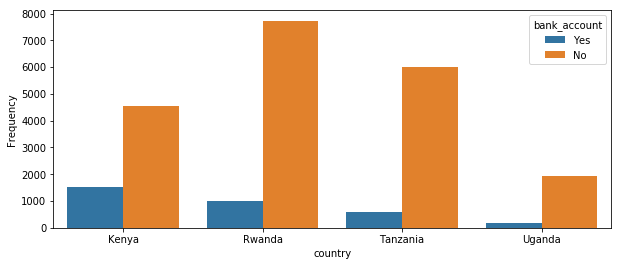

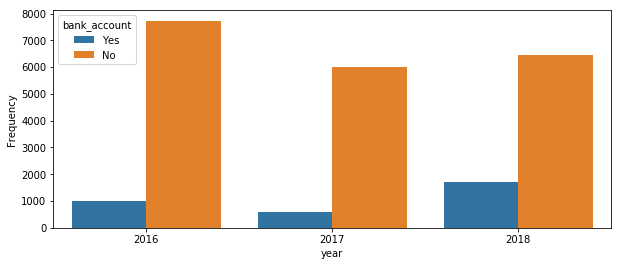

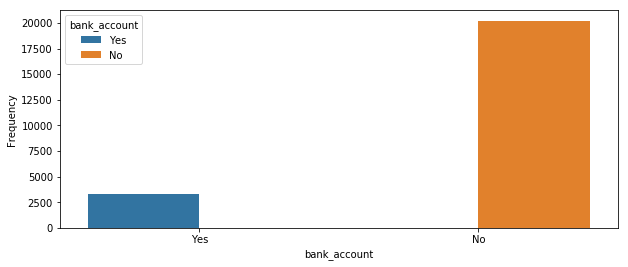

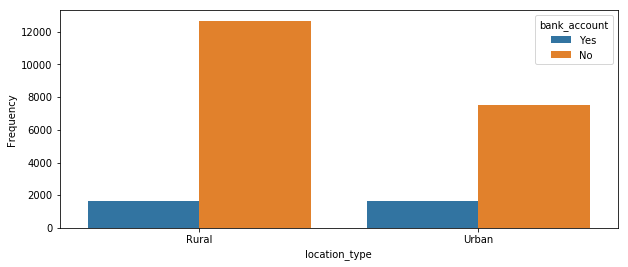

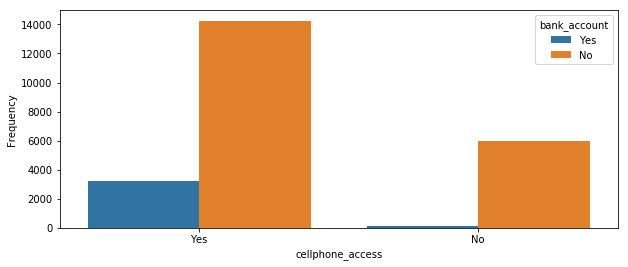

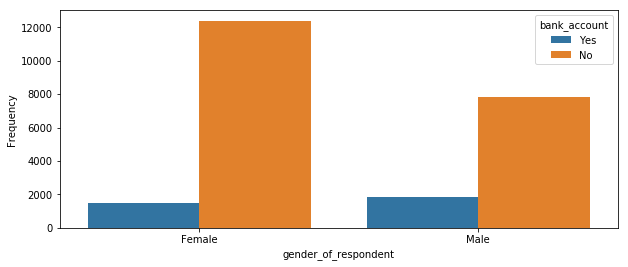

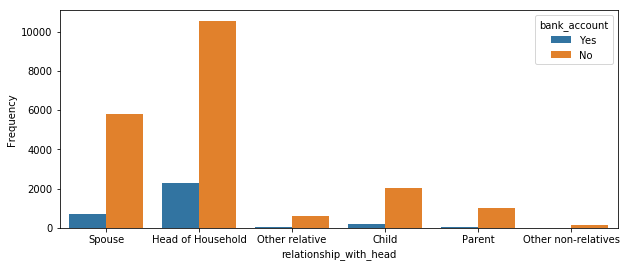

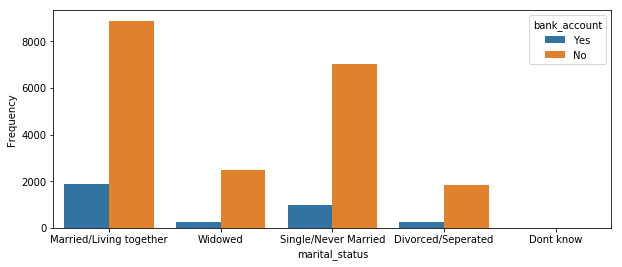

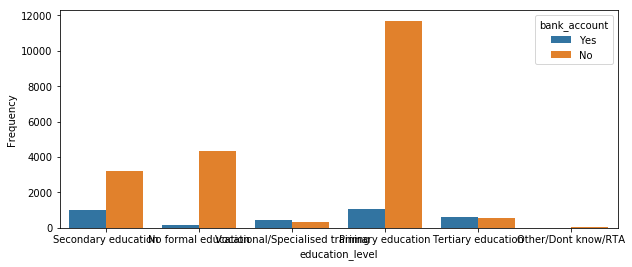

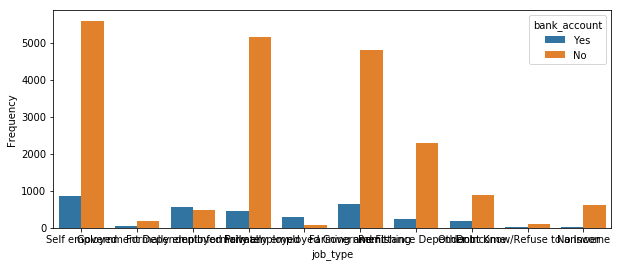

In [13]:
def label_check(data, cols):
    
    for i in cols:
        plt.figure(figsize=(10,4))
        sns.countplot(x=data[i], hue='bank_account', data=data)
        
        plt.xlabel(i)
        plt.ylabel('Frequency')
        plt.show()
    
        
label_check(train, new_columns)

AxesSubplot(0.125,0.125;0.775x0.755)


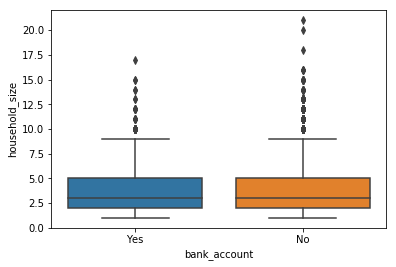

In [14]:
print(sns.boxplot(x='bank_account', y='household_size', data=train))

AxesSubplot(0.125,0.125;0.775x0.755)


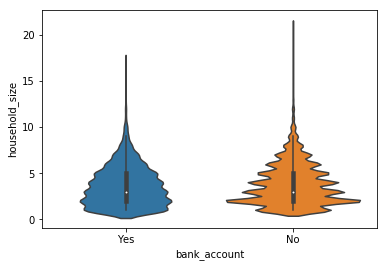

In [16]:
print(sns.violinplot(x='bank_account', y='household_size', data=train))

AxesSubplot(0.125,0.125;0.775x0.755)


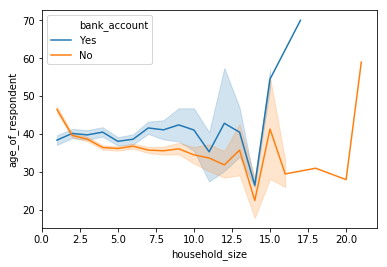

In [31]:
print(sns.lineplot(data=train, y='age_of_respondent', x='household_size', hue='bank_account'))

In [23]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [32]:
from sklearn import preprocessing

def encode_string(data):
    enc = preprocessing.LabelEncoder()
    enc.fit(data)
    enc_features = enc.transform(data)
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_features.reshape(-1,1))
    return encoded.transform(enc_features.reshape(-1,1)).toarray()

In [33]:
cat_cols = ['location_type', 'cellphone_access', 'gender_of_respondent', 'relationship_with_head',
            'marital_status', 'education_level', 'job_type']

#train['job_type'].value_counts()

In [ ]:
for col in cat_cols:
    temps = []
    temp = encode_string(train[col])
    temps.append(temp)